(backward_compatibility)=
# Backward Compatibility

The legacy MOLASS program produces its analysis results in Excel books. We will explain here how to do the same in Molass Library. 

## Learning Points
* rgcurve = ssd.xr.compute_rgcurve()
* ranges = decomposition.get_paired_ranges()
* decomposition.plot_components(rgcurve=rgcurve, ranges=ranges)
* rgcurve_atsas = ssd.xr.compute_rgcurve_atsas()
* mapping = ssd.estimate_mapping()
* conc_info = ssd.make_conc_info(mapping)
* rg_info = rgcurve, rgcurve_atsas
* make_v1report(ssd, conc_info=conc_info, rg_info=rg_info, lr_info=decomposition, ranges=ranges)

## Preparation for the Report

Although it is possible to do it as well without any preparation (that is, implicitly all by default), we will show explicitly what to prepare in the hope that it will better serve as explanation and can be easy to modify.

First, we will prepare rg curves and analysis ranges. 

zeros at the angular ends of error data have been replaced with the adjacent values.


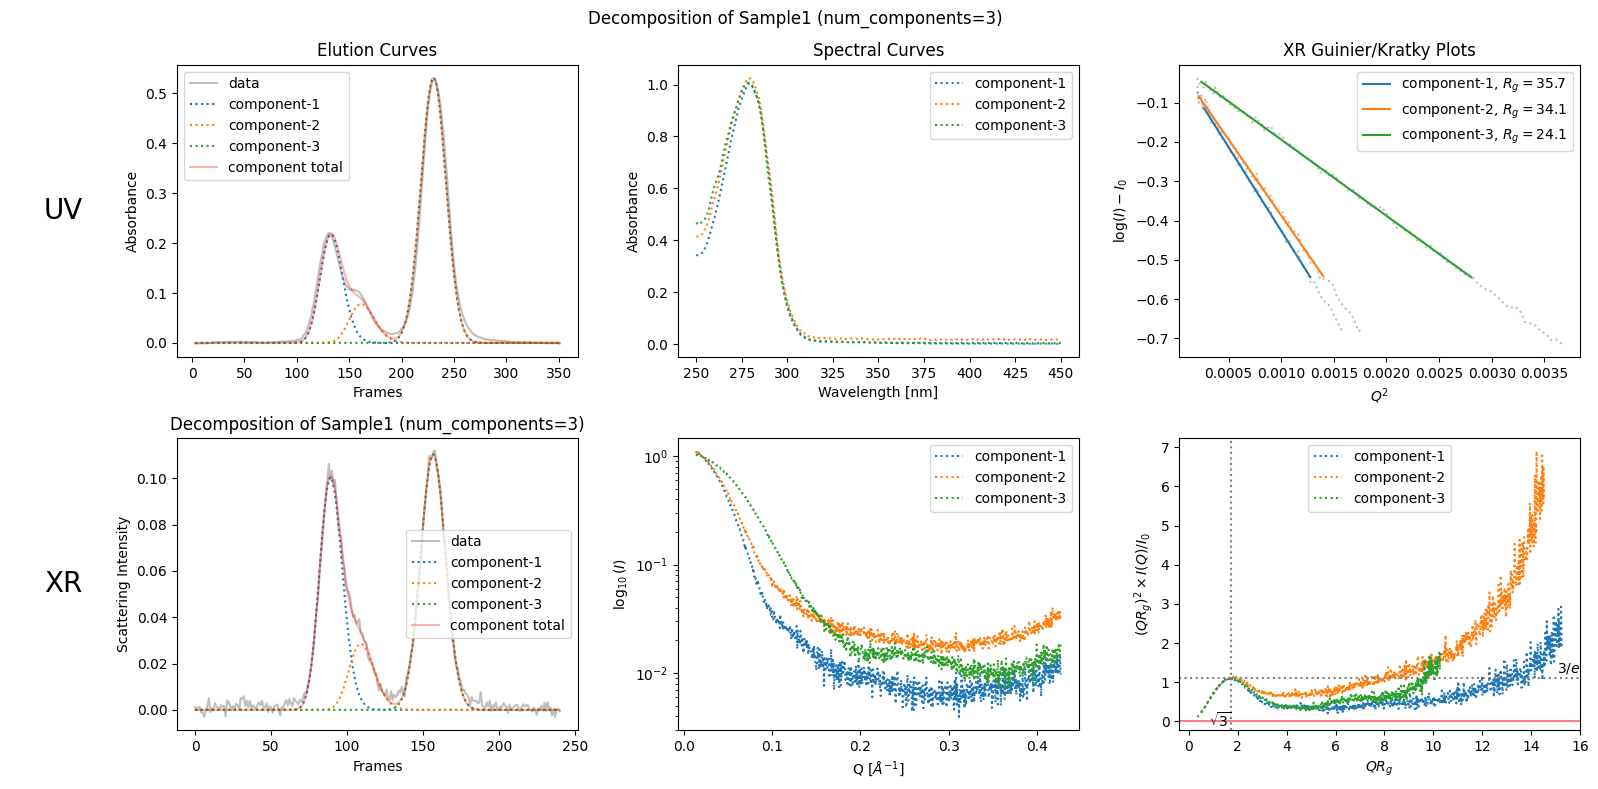

In [6]:
from molass import get_version
assert get_version() >= '0.7.0', "This script requires molass version 0.7.0 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition(num_components=3)
plot5 = decomposition.plot_components(title="Decomposition of Sample1 (num_components=3)")

100%|██████████| 241/241 [00:07<00:00, 32.75it/s]


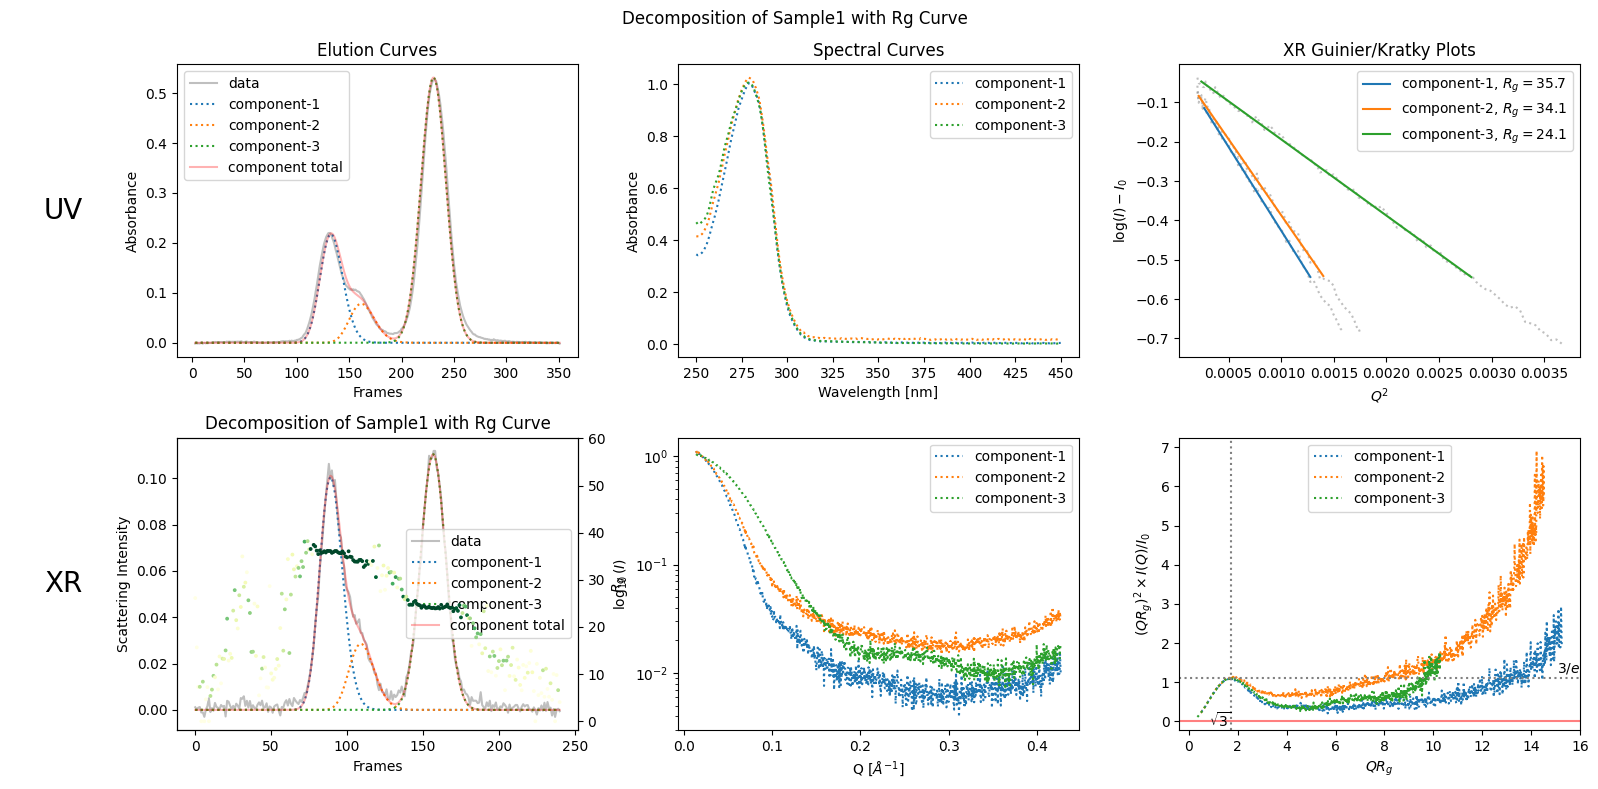

In [7]:
rgcurve = corrected_ssd.xr.compute_rgcurve()
plot6 = decomposition.plot_components(title="Decomposition of Sample1 with Rg Curve", rgcurve=rgcurve)

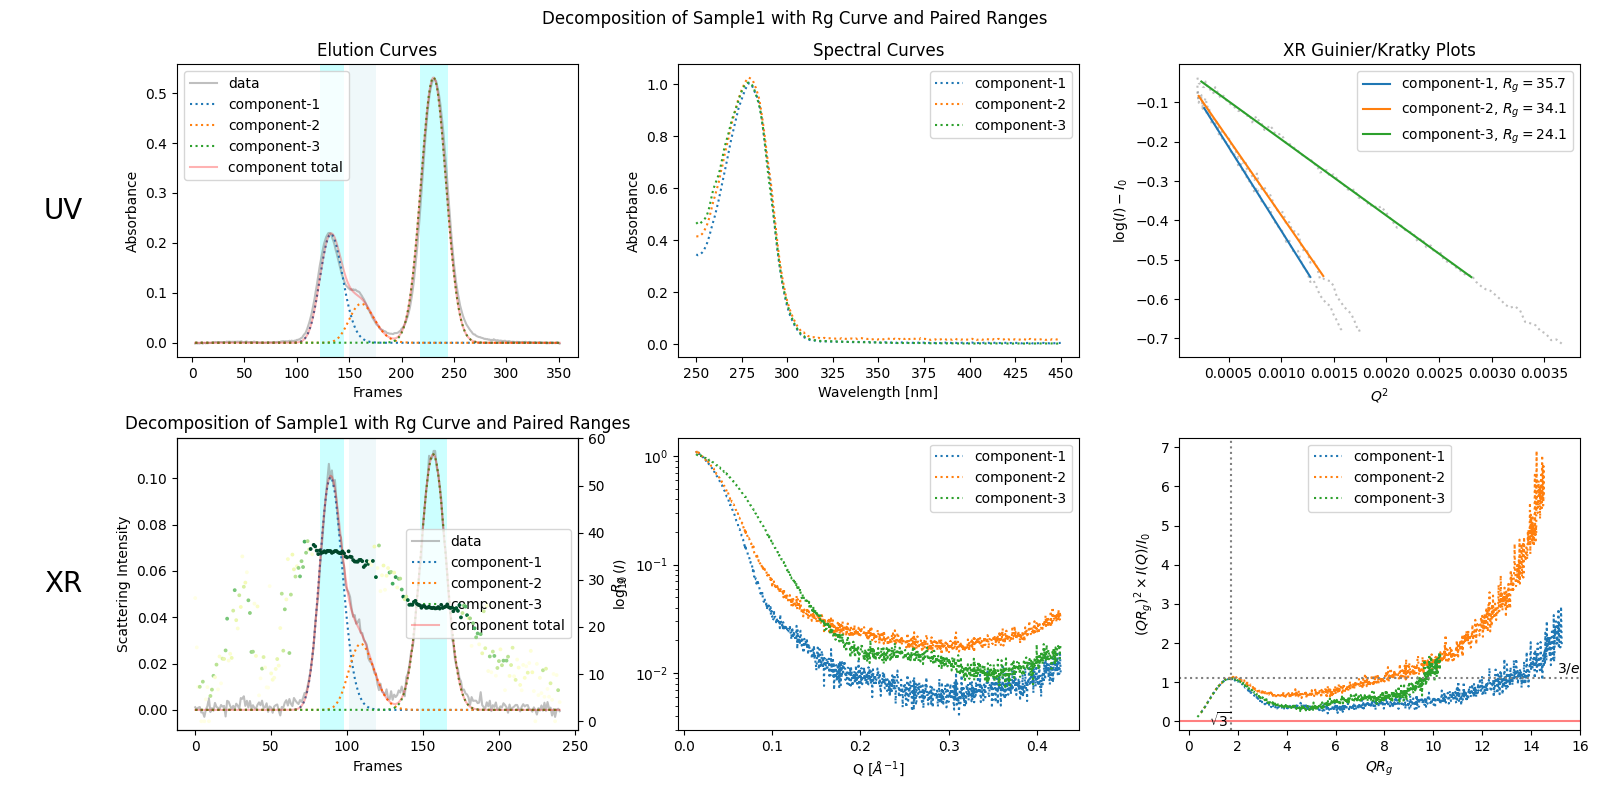

In [8]:
pairedranges = decomposition.get_pairedranges()
plot8 = decomposition.plot_components(title="Decomposition of Sample1 with Rg Curve and Paired Ranges", rgcurve=rgcurve, pairedranges=pairedranges)

In [9]:
rgcurve_atsas = corrected_ssd.xr.compute_rgcurve_atsas()

100%|██████████| 241/241 [00:35<00:00,  6.82it/s]


## Making the Excel Report

To make the report, we also need the concentration information which can be prepared as follows.

In [10]:
from molass.Reports.V1Report import make_v1report

rgcurves = rgcurve, rgcurve_atsas
make_v1report(corrected_ssd, rgcurves=rgcurves, decomposition=decomposition, ranges=pairedranges)

([1], (1, 1, True)):   0%|          | 0/31 [00:00<?, ?it/s]2025-10-15 10:52:51 Controller initialized with temp_folder=c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\.temp
2025-10-15 10:52:52 Progress unit 2 reported error at step 1.
([1], (1, 1, True)):   6%|▋         | 2/31 [00:01<00:20,  1.45it/s]
2025-10-15 10:53:16 excessive step_done call!


Saving Guinier Analysis Report to c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\.temp/--serial_analysis-temp.xlsx


2025-10-15 10:53:21 Decomposition.get_cd_color_info: xr_ranks is None, using default ranks.
2025-10-15 10:53:21 Starting LRF report generation...
2025-10-15 10:53:21 cnv_ranges=[PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98)), PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119)), PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] from ranges_=[[(82, 89), (89, 98)], [(101, 119)], [(148, 157), (157, 166)]]
2025-10-15 10:53:23 Converting to Guinier result array...
2025-10-15 10:53:23 Conversion to Guinier result array completed.
2025-10-15 10:53:23 lrf executer has been constructed with conc_factor=8.155.
2025-10-15 10:53:23 ZeroExtrapolator: use_elution_models=True
2025-10-15 10:53:23 cnv_ranges=[PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98)), PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119)), PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))], num_ranges=5
2025-10-15 10:53:23 lrf solver has been constructed with conc_factor 8.155, Rg=None.
2025-

data.shape= (984, 241)
data.shape= (984, 241)
Optimization terminated successfully.
         Current function value: 0.000722
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
It took  0.0 num_iterations= 0


2025-10-15 10:53:24 solved with aq_smoothness=False, aq_positivity=False resulting into iterations=0
2025-10-15 10:53:24 selected 2-th range has 2 element(s).
2025-10-15 10:53:24 solve_range called with lrf_rank=1
2025-10-15 10:53:24 creating C matrix in ranges [PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98)), PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119))] with concentration_datatype=2
2025-10-15 10:53:24 C matrix data.shape is (2, 19)
2025-10-15 10:53:24 pno=1, nth=1, cdl_list=[1, 1], use_elution_models=True
2025-10-15 10:53:24 SVD-reconstructed with rank=2 in range [101, 120).
2025-10-15 10:53:24 solving rank 2 factorization of M into P, C with shapes (984, 19) = (984, 2) @ (2, 19)
2025-10-15 10:53:24 solved with aq_smoothness=False, aq_positivity=False resulting into iterations=0


Optimization terminated successfully.
         Current function value: 0.000773
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
It took  0.0009996891021728516 num_iterations= 0
Optimization terminated successfully.
         Current function value: 0.001362
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
It took  0.0009996891021728516 num_iterations= 0


2025-10-15 10:53:24 selected 3-th range has 1 element(s).
2025-10-15 10:53:24 solve_range called with lrf_rank=1
2025-10-15 10:53:24 creating C matrix in ranges [PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] with concentration_datatype=2
2025-10-15 10:53:24 C matrix data.shape is (1, 10)
2025-10-15 10:53:24 pno=2, nth=0, cdl_list=[1], use_elution_models=True
2025-10-15 10:53:24 SVD-reconstructed with rank=1 in range [148, 158).
2025-10-15 10:53:24 solving rank 1 factorization of M into P, C with shapes (984, 10) = (984, 1) @ (1, 10)
2025-10-15 10:53:24 solved with aq_smoothness=False, aq_positivity=False resulting into iterations=0
2025-10-15 10:53:24 selected 4-th range has 1 element(s).
2025-10-15 10:53:24 solve_range called with lrf_rank=1
2025-10-15 10:53:24 creating C matrix in ranges [PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] with concentration_datatype=2
2025-10-15 10:53:24 C matrix data.shape is (1, 10)
2025-10-15 10:53:24 pno=2, nth=0, cdl

Optimization terminated successfully.
         Current function value: 0.001140
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
It took  0.0020003318786621094 num_iterations= 0
Optimization terminated successfully.
         Current function value: 0.000189
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
It took  0.0009992122650146484 num_iterations= 0


2025-10-15 10:53:24 selected 0-th range has 1 element(s).
2025-10-15 10:53:24 solve_range called with lrf_rank=2
2025-10-15 10:53:24 creating C matrix in ranges [PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98))] with concentration_datatype=2
2025-10-15 10:53:24 C matrix data.shape is (2, 8)


solver finished.


2025-10-15 10:53:27 BoundedLrfSolver solved range 82-90 with lrf_rank=2
2025-10-15 10:53:27 selected 1-th range has 2 element(s).
2025-10-15 10:53:27 solve_range called with lrf_rank=2
2025-10-15 10:53:27 creating C matrix in ranges [PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98)), PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119))] with concentration_datatype=2
2025-10-15 10:53:27 C matrix data.shape is (4, 10)
c:\Program Files\Python312\Lib\site-packages\molass_legacy\Trimming\Sigmoid.py:14: RuntimeWarning: overflow encountered in exp
  return L/(1 + np.exp(-k*(x-x0))) + b
c:\Program Files\Python312\Lib\site-packages\molass_legacy\Trimming\Sigmoid.py:14: RuntimeWarning: overflow encountered in exp
  return L/(1 + np.exp(-k*(x-x0))) + b
c:\Program Files\Python312\Lib\site-packages\molass_legacy\Trimming\Sigmoid.py:14: RuntimeWarning: overflow encountered in exp
  return L/(1 + np.exp(-k*(x-x0))) + b


c:\Program Files\Python312\Lib\site-packages\molass_legacy\Trimming\Sigmoid.py:14: RuntimeWarning: overflow encountered in exp
  return L/(1 + np.exp(-k*(x-x0))) + b


2025-10-15 10:53:30 BoundedLrfSolver solved range 89-99 with lrf_rank=2
2025-10-15 10:53:30 selected 2-th range has 2 element(s).
2025-10-15 10:53:30 solve_range called with lrf_rank=2
2025-10-15 10:53:30 creating C matrix in ranges [PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98)), PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119))] with concentration_datatype=2
2025-10-15 10:53:30 C matrix data.shape is (4, 19)


2025-10-15 10:53:32 BoundedLrfSolver solved range 101-120 with lrf_rank=2
2025-10-15 10:53:32 selected 3-th range has 1 element(s).
2025-10-15 10:53:32 solve_range called with lrf_rank=2
2025-10-15 10:53:32 creating C matrix in ranges [PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] with concentration_datatype=2
2025-10-15 10:53:32 C matrix data.shape is (2, 10)


2025-10-15 10:53:35 BoundedLrfSolver solved range 148-158 with lrf_rank=2
2025-10-15 10:53:35 selected 4-th range has 1 element(s).
2025-10-15 10:53:35 solve_range called with lrf_rank=2
2025-10-15 10:53:35 creating C matrix in ranges [PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] with concentration_datatype=2
2025-10-15 10:53:35 C matrix data.shape is (2, 10)


2025-10-15 10:53:38 BoundedLrfSolver solved range 157-167 with lrf_rank=2
2025-10-15 10:53:38 [0-0] color=green, lrf_rank=1
2025-10-15 10:53:38 [2-3] color=green, lrf_rank=1
2025-10-15 10:53:38 ZeroExtrapolator: using LRF Ppol.
2025-10-15 10:53:38 extrapolating for [[[82, 89], [89, 98]], [[101, 119]], [[148, 157], [157, 166]]]
2025-10-15 10:53:38 extrapolation start for the 0th peak ad(0) with range (82, 89)
2025-10-15 10:53:38 Guinier boundary is assumed at Q[72]=0.0446.
2025-10-15 10:53:38 1st peak asc-side extrapolation done.


solver finished.
[0] [0, 0, PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98))] 2
[1] [0, 1, PairedRange(PeakInfo(0,89,'elm_recs'),(82, 89),(89, 98))] 2
[2] [1, 0, PairedRange(PeakInfo(1,109,'elm_recs'),(101, 119))] 1
[3] [2, 0, PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] 2
[4] [2, 1, PairedRange(PeakInfo(2,157,'elm_recs'),(148, 157),(157, 166))] 2


2025-10-15 10:53:40 1st peak asc-side atsas result: Rg=36.2128 I(0)=0.122869
2025-10-15 10:53:40 1st peak asc-side rg re-estimation done with extrapolated Rg=35.7 


  Concentration  Overlap    File
  1.30 / 1.7164    1 -  75  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00082_avg.dat
  1.43 / 1.4788   23 -  85  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00083_avg.dat
  1.55 / 1.3099   19 -  75  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00084_avg.dat
  1.65 / 1.1951   19 -  73  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00085_avg.dat
  1.73 / 1.0991   17 -  99  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00086_avg.dat
  1.78 / 1.0369   17 -  69  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00087_avg.dat
  1.78 / 0.9861   17 -  71  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00089_avg.dat
  1.79  (reference)         c:\Users\takahashi\GitHub\molass-tutorial\chapters

2025-10-15 10:53:45 1st peak asc-side book done.
2025-10-15 10:53:49 1st peak asc-side atsas book done.
2025-10-15 10:53:49 extrapolation start for the 0th peak ad(1) with range (89, 98)
2025-10-15 10:53:49 Guinier boundary is assumed at Q[72]=0.0446.
2025-10-15 10:53:49 1st peak desc-side extrapolation done.
2025-10-15 10:53:52 1st peak desc-side atsas result: Rg=36.0713 I(0)=0.12399
2025-10-15 10:53:52 1st peak desc-side rg re-estimation done with extrapolated Rg=36 


  Concentration  Overlap    File
  1.00 / 1.6855    1 - 115  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00098_avg.dat
  1.07 / 1.5404    1 -  55  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00097_avg.dat
  1.14 / 1.4136    1 -  85  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00096_avg.dat
  1.25 / 1.2958    1 -  79  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00095_avg.dat
  1.34 / 1.2066    1 -  83  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00094_avg.dat
  1.45 / 1.1302    1 -  83  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00093_avg.dat
  1.54 / 1.0717   17 -  87  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00092_avg.dat
  1.64 / 1.0271    1 -  59  c:\Users\takahashi\GitHub\molass-tutorial\chapters

2025-10-15 10:53:57 1st peak desc-side book done.
2025-10-15 10:54:01 1st peak desc-side atsas book done.
2025-10-15 10:54:03 1st peak overlay book done.
2025-10-15 10:54:03 extrapolation start for the 1st peak ad(0) with range (101, 119)
2025-10-15 10:54:03 Guinier boundary is assumed at Q[106]=0.0589.
2025-10-15 10:54:03 2nd peak both-side extrapolation done.
2025-10-15 10:54:08 2nd peak both-side atsas result: Rg=32.379 I(0)=0.052383
2025-10-15 10:54:08 2nd peak both-side rg re-estimation done with extrapolated Rg=33.1 


  Concentration  Overlap    File
  0.30 / 3.4171    3 -  55  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00119_avg.dat
  0.35 / 2.7545   43 - 101  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00118_avg.dat
  0.39 / 2.6145   13 -  77  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00117_avg.dat
  0.43 / 2.3822    7 -  81  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00116_avg.dat
  0.49 / 2.0274   35 -  97  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00115_avg.dat
  0.54 / 1.9767    1 -  45  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00114_avg.dat
  0.59 / 1.7519    5 -  81  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00113_avg.dat
  0.65 / 1.6420    3 -  65  c:\Users\takahashi\GitHub\molass-tutorial\chapters

2025-10-15 10:54:13 2nd peak both-side book done.
2025-10-15 10:54:17 2nd peak both-side atsas book done.
2025-10-15 10:54:17 extrapolation start for the 2nd peak ad(0) with range (148, 157)
2025-10-15 10:54:17 Guinier boundary is assumed at Q[124]=0.0664.
2025-10-15 10:54:17 3rd peak asc-side extrapolation done.
2025-10-15 10:54:21 3rd peak asc-side atsas result: Rg=24.3438 I(0)=0.121416
2025-10-15 10:54:21 3rd peak asc-side rg re-estimation done with extrapolated Rg=24.1 


  Concentration  Overlap    File
  2.20 / 1.8049    5 - 105  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00148_avg.dat
  2.55 / 1.5959   17 - 117  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00149_avg.dat
  2.89 / 1.4210   43 - 105  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00150_avg.dat
  3.24 / 1.2650   37 - 115  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00151_avg.dat
  3.54 / 1.1696   73 - 145  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00152_avg.dat
  3.83 / 1.0988   11 - 125  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00153_avg.dat
  4.03 / 1.0429   43 - 115  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00154_avg.dat
  4.17 / 1.0132   31 - 101  c:\Users\takahashi\GitHub\molass-tutorial\chapters

2025-10-15 10:54:26 3rd peak asc-side book done.
2025-10-15 10:54:32 3rd peak asc-side atsas book done.
2025-10-15 10:54:32 extrapolation start for the 2nd peak ad(1) with range (157, 166)
2025-10-15 10:54:32 Guinier boundary is assumed at Q[122]=0.0656.
2025-10-15 10:54:32 3rd peak desc-side extrapolation done.
2025-10-15 10:54:35 3rd peak desc-side atsas result: Rg=24.2569 I(0)=0.120737
2025-10-15 10:54:35 3rd peak desc-side rg re-estimation done with extrapolated Rg=24.1 


  Concentration  Overlap    File
  2.55 / 1.9215   15 -  99  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00166_avg.dat
  2.90 / 1.6697    1 - 111  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00165_avg.dat
  3.19 / 1.4741   45 - 113  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00164_avg.dat
  3.48 / 1.3288   19 - 113  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00163_avg.dat
  3.71 / 1.2290   11 -  99  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00162_avg.dat
  3.93 / 1.1448   31 - 113  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00161_avg.dat
  4.09 / 1.0811   31 - 143  c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged/PREFIX1_00160_avg.dat
  4.21 / 1.0415   57 - 131  c:\Users\takahashi\GitHub\molass-tutorial\chapters

2025-10-15 10:54:40 3rd peak desc-side book done.
2025-10-15 10:54:46 3rd peak desc-side atsas book done.
2025-10-15 10:54:48 3rd peak overlay book done.
2025-10-15 10:54:48 c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\averaged has been removed.
2025-10-15 10:54:48 premature all_done call!
2025-10-15 10:54:48 Generating summary report...
2025-10-15 10:54:48 Summary includes low quality results. Be aware.
2025-10-15 10:54:48 add_summary_format_setting start for c:\Users\takahashi\GitHub\molass-tutorial\chapters\08\report_folder\.temp/--summary.xlsx(Summary for Publication)


[Errno 2] No such file or directory: 'c:\\Program Files\\Python312\\Lib\\site-packages\\molass_data\\SAMPLE1/Xray_Scattering_Info.txt'


2025-10-15 10:54:50 summary book done.
2025-10-15 10:55:03 books merge done.
2025-10-15 10:55:03 Summary report generation completed.
2025-10-15 10:55:03 premature all_done call!
Killed the remaining process pid=26816


SerialData.__del__ ok
